# Geospatial distribution of total cases
Total number of cases grouped by province in the latest available day, only for provinces in the north-eastern part of Italy

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from src.data.read_dataset import get_processed_dataset
from src.visualization import visualize

prov_df = get_processed_dataset('dpc-province')

In [2]:
last_day = prov_df[prov_df.data == max(prov_df.data)]

In [3]:
italy = gpd.read_file('../../data/raw/prov2019.geojson')
italy_merged = italy.merge(last_day, how = 'left', left_on = 'COD_PROV', right_on = 'codice_provincia')
italy_merged = italy_merged[italy_merged.COD_REG.isin([5,6])]

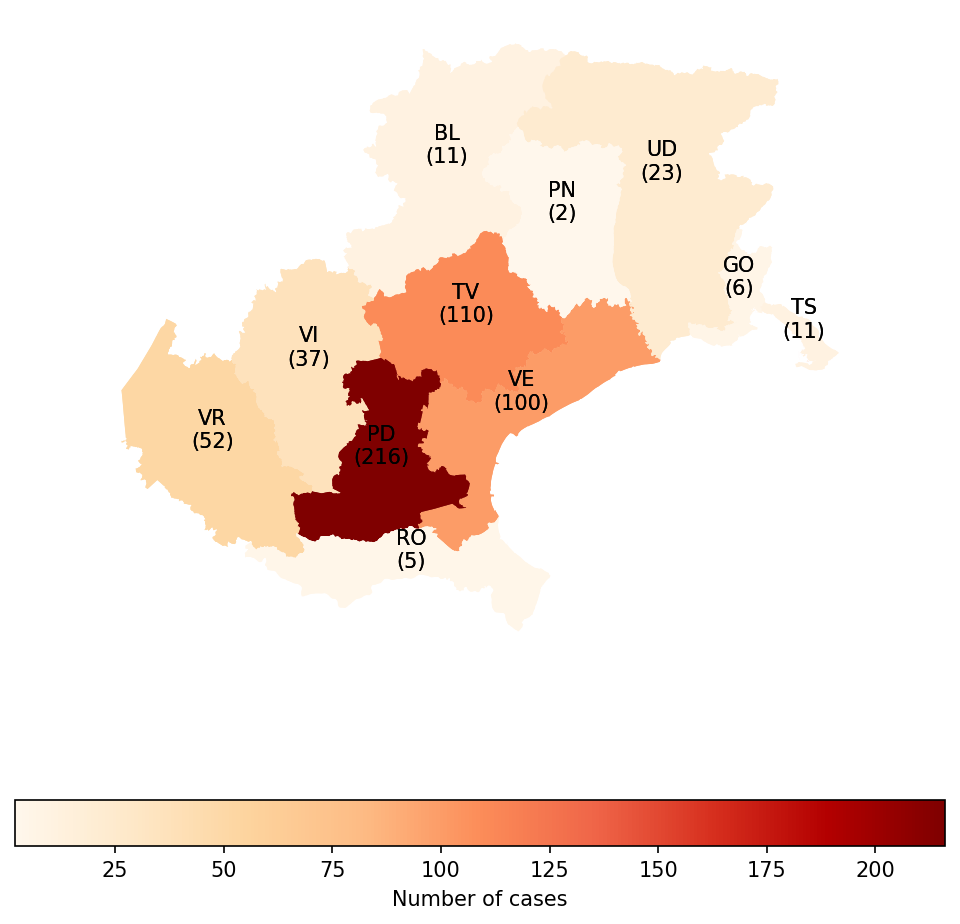

In [4]:
fig, ax = plt.subplots(1, figsize=(8, 8))
italy_merged.plot(ax=ax, column='totale_casi', cmap='OrRd', legend=True, legend_kwds={'label': "Number of cases", 'orientation': "horizontal"})
italy_merged.apply(lambda x: ax.annotate(s=f'{x.SIGLA}\n({x.totale_casi})', xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
ax.set_axis_off()
plt.show()

In [5]:
print(f'Timestamp: {max(prov_df.data)}')

Timestamp: 2020-03-07 18:00:00
